## Potential and current
This notebooks tries to resemble the potential distribution and current flow lines using SEM electrodes, i.e., Fig. 4 a and b of Ronczka et al. (2015).

Ronczka, M., Rücker, C. & Günther, T. (2015): Numerical study of long electrode electric resistivity tomography – Accuracy, sensitivity and resolution. *Geophysics* 80(6), E317-328, [doi:10.1190/geo2014-0551.1](https://doi.org/10.1190/geo2014-0551.1).

In [1]:
import numpy as np
import pygimli as pg
import pygimli.meshtools as mt
from pygimli.physics import ert

In [40]:
size2 = 400
symm = True
if symm:
    world = mt.createWorld(start=[-size2, -size2, -size2], end=[size2, 0, 0], worldMarker=True)
    # change marker (boundary conditions) of symmetry axis
    for b in world.boundaries():
        if b.center().y() == 0:
            b.setMarker(-1)
else:
    world = mt.createWorld(start=[-size2, -size2, -size2], end=[size2, size2, 0], worldMarker=True)

print(world)

Mesh: Nodes: 8 Cells: 0 Boundaries: 6


In [41]:
blen = 100
dz = 2.0
zvec = np.arange(0, blen+dz*0.01, dz)
bnodes = []
elpos = [-150, 150]
for i, bpos in enumerate(elpos):
    nodes = [world.createNode([bpos, 0, -z], marker=-10000-i) for z in zvec]
    bnodes.append(nodes)
    for j in range(len(nodes)-1):
        world.createEdge(nodes[j], nodes[j+1])

world.createNode([0, size2/2, 0], marker=-999)
world.createNode([0, -size2/2, 0], marker=-1000)
print(world)

Mesh: Nodes: 112 Cells: 0 Boundaries: 6


In [42]:
mesh = mt.createMesh(world, quality=1.3)
mesh = mesh.createP2()
print(mesh)

Mesh: Nodes: 8945 Cells: 5612 Boundaries: 11946


In [43]:
scheme = ert.DataContainer()
for xe in elpos:
    scheme.createSensor([xe, 0, 0])
scheme.createFourPointData(i, 0, 1, -1, -1)

1

In [44]:
# mesh = mesh.createP2()
allu = ert.simulate(mesh=mesh, scheme=scheme, res=1.0, returnFields=True, calcOnly=True, sr=False)
u = allu[1] - allu[0]
u.shape

(8945,)

In [45]:
dx = 5.0
grid2d = mt.createGrid(x=np.arange(-250, 251, dx), y=np.arange(-200, 0.1, dx))

In [46]:
pot = pg.interpolate(mesh, u, x=pg.x(grid2d), y=pg.x(grid2d)*0, z=pg.y(grid2d))

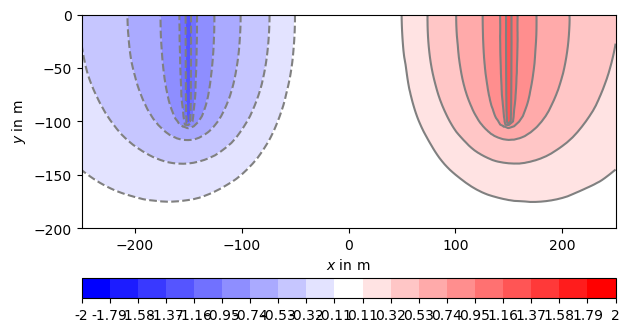

In [48]:
grid2d.show(pg.utils.logDropTol(pot, 1e-3), cMap="bwr", cMin=-2, cMax=2, nLevs=20);

In [50]:
len(pot), mesh

(4141, Mesh: Nodes: 8945 Cells: 5612 Boundaries: 11946)

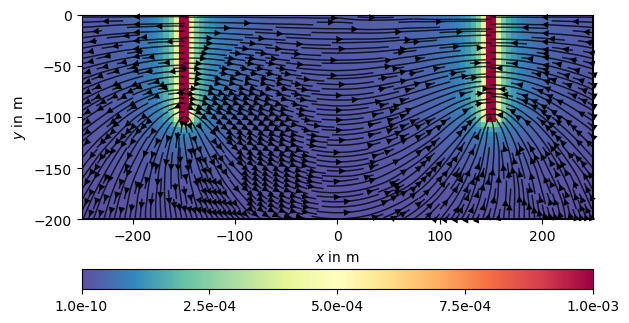

In [61]:
from pygimli.viewer.mpl import drawStreams
j = pg.solver.grad(grid2d, pot)
jabs = np.sqrt(pg.x(j)**2 + pg.y(j)**2 + pg.z(j)**2)
ax, cb = grid2d.show(jabs, cMin=1e-10, cMax=1e-3, cMap="Spectral_r")
drawStreams(ax, grid2d, pot, color='Black')
